# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Fatiha Nadia Salsabila
- **Email:** fatiha.nadia.salsabila-2021@fst.unair.ac.id
- **ID Dicoding:** fatihanadias

## Menentukan Pertanyaan Bisnis


- Produk apa yang mendapat review terburuk dan terbaik menurut customer?
- Bagaimana tingkat penjualan produk di negara-negara bagian?
- Pembayaran tipe apa yang paling sering digunakan oleh customer?
- Apakah ongkir dengan nilai yang dibayarkan customer saling bersesuaian?

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import numpy as np

In [ ]:
sns.set(style='whitegrid')

## Data Wrangling

### Gathering Data

####Membuat dataframe customer

In [143]:
customer_df = pd.read_csv("/content/customers_dataset.csv")
customer_df.head() #menampilkan 5 baris pertama dataframe

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


####Membuat dataframe order_items


In [144]:
order_items_df = pd.read_csv("/content/order_items_dataset.csv")
order_items_df.head() #menampilkan 5 baris pertama dataframe

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


####Membuat dataframe order_payments

In [145]:
order_payments_df = pd.read_csv("/content/order_payments_dataset.csv")
order_payments_df.head() #menampilkan 5 baris pertama dataframe

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


####Membuat dataframe order_review

In [146]:
order_review_df = pd.read_csv("/content/order_reviews_dataset.csv")
order_review_df.head() #menampilkan 5 baris pertama dataframe

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


####Membuat dataframe orders

In [147]:
orders_df = pd.read_csv("/content/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


####Membuat dataframe products

In [148]:
products_df = pd.read_csv("/content/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


####Membuat dataframe prod_name



In [149]:
prodnames_df = pd.read_csv("/content/product_category_name_translation.csv")
prodnames_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

####Assessing dataframe costumer_df

In [150]:
#memeriksa tipe data per kolom
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


>Tidak terjadi masalah dengan tipe data dan missing value pada `customer_df`.

In [151]:
#memeriksa data duplikat
print("Jumlah duplikasi: ", customer_df.duplicated().sum())

Jumlah duplikasi:  0


>Tidak ada data yang terduplikat pada `customer_df`.

####Assessing dataframe order_items_df

In [152]:
#memeriksa tipe data per kolom
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


>Variabel `shipping_limit_date` terbaca sebagai tipe data "object", sehingga perlu diubah menjadi "datetime".

In [153]:
#menampilkan statistika deskriptif
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [154]:
#memeriksa data duplikat
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


>Tidak ada data yang terduplikat pada `order_items_df`.

####Assessing dataframe order_payments_df

In [155]:
#memeriksa tipe data per kolom
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


>Tidak terjadi masalah dengan tipe data dan missing value pada `order_payments_df`.

In [156]:
#menampilkan statistika deskriptif
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [157]:
#memeriksa data duplikat
print("Jumlah duplikasi: ",order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


>Tidak ada data yang terduplikat pada `order_payments_df`.

####Assessing dataframe order_review_df

In [158]:
#memeriksa tipe data per kolom
order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43144 entries, 0 to 43143
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                43144 non-null  object
 1   order_id                 43144 non-null  object
 2   review_score             43144 non-null  int64 
 3   review_comment_title     5162 non-null   object
 4   review_comment_message   17851 non-null  object
 5   review_creation_date     43144 non-null  object
 6   review_answer_timestamp  43144 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.3+ MB


>Variabel `review_creation_date` dan `review_answer_timestamp` terbaca sebagai tipe data "object". Selain itu terjadi indikasi missing value pada `review_comment_title` dan `review_comment_message`.



In [159]:
#memeriksa missing values tiap kolom
order_review_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       37982
review_comment_message     25293
review_creation_date           0
review_answer_timestamp        0
dtype: int64

>Ada banyak missing values pada `review_comment_title` dan `review_comment_message` sehingga akan ditinjau ulang sebelum dianalisis.

In [160]:
#memeriksa data duplikat
print("Jumlah duplikasi: ",order_review_df.duplicated().sum())

Jumlah duplikasi:  0


>Tidak ada duplikasi pada `order_review_df`

####Assessing dataframe orders_df

In [161]:
#memeriksa tipe data per kolom
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35434 entries, 0 to 35433
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       35434 non-null  object
 1   customer_id                    35434 non-null  object
 2   order_status                   35434 non-null  object
 3   order_purchase_timestamp       35434 non-null  object
 4   order_approved_at              35370 non-null  object
 5   order_delivered_carrier_date   34816 non-null  object
 6   order_delivered_customer_date  34376 non-null  object
 7   order_estimated_delivery_date  35433 non-null  object
dtypes: object(8)
memory usage: 2.2+ MB


>Variabel ke-4 hingga ke-8 seharusnya bertipe "datetime", serta ada indikasi missing values.

In [162]:
#memeriksa missing values tiap kolom
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  64
order_delivered_carrier_date      618
order_delivered_customer_date    1058
order_estimated_delivery_date       1
dtype: int64

In [163]:
#memeriksa data duplikat
print("Jumlah duplikasi: ",orders_df.duplicated().sum())

Jumlah duplikasi:  0


>Tidak ada data terduplikasi pada `orders_df`

####Assessing dataframe products

In [164]:
#memeriksa tipe data per kolom
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


>Tidak ada masalah tipe data, tapi ada indikasi missing value

In [165]:
#memeriksa missing values tiap kolom
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [166]:
#memeriksa data duplikat
print("Jumlah duplikasi: ",products_df.duplicated().sum())

Jumlah duplikasi:  0


>Tidak ada data terduplikasi pada `products_df`

####Assessing dataframe prodnames

In [167]:
#memeriksa tipe data per kolom
prodnames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


>Tidak ada masalah tipe data maupun missing values

In [168]:
#memeriksa data duplikat
print("Jumlah duplikasi: ",prodnames_df.duplicated().sum())

Jumlah duplikasi:  0


>Tidak ada data duplikasi pada prodnames_df

### Cleaning Data

####Dataframe customer

In [169]:
#menghapus kolom yang tidak diperlukan
customer_df.drop(['customer_unique_id','customer_zip_code_prefix'], axis=1, inplace=True)
customer_df.head()

,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP


####Dataframe order_items

In [170]:
#menghapus kolom yang tidak diperlukan
order_items_df.drop(['order_item_id','seller_id','shipping_limit_date'], axis=1, inplace=True)
order_items_df.head()

,order_id,product_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14


####Dataframe order_payments

In [171]:
#menghapus kolom yang tidak diperlukan
order_payments_df.drop(['payment_sequential','payment_installments'], axis=1, inplace=True)
order_payments_df.head()

,order_id,payment_type,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,128.45


####Dataframe order_review

In [172]:
#menghapus kolom yang tidak diperlukan
order_review_df.drop(['review_id','review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp'], axis=1, inplace=True)
order_review_df.head()

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5
3,658677c97b385a9be170737859d3511b,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,5


####Dataframe orders

In [173]:
#menghapus kolom yang tidak diperlukan
orders_df.drop(orders_df.columns.difference(['order_id','customer_id',"order_status"]), axis=1, inplace=True)
orders_df.head()

,order_id,customer_id,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered


In [174]:
#memeriksa missing values tiap kolom
orders_df.isna().sum()

order_id        0
customer_id     0
order_status    0
dtype: int64

####Dataframe products

In [175]:
#menghapus kolom yang tidak diperlukan
products_df.drop(products_df.columns.difference(['product_id','product_category_name']), axis=1, inplace=True)
products_df.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [177]:
#memeriksa missing values tiap kolom
products_df.isna().sum()

product_id                 0
product_category_name    610
dtype: int64

In [178]:
#mengganti missing value dengan "not defined"
products_df.product_category_name.fillna(value="Not defined", inplace=True)

In [179]:
products_df.isna().sum()

product_id               0
product_category_name    0
dtype: int64

##Exploratory Data Analysis

###Exploratory orders dan customer

In [180]:
#menggabungkan orders dan customer
customer_orders_df = pd.merge(
   left=orders_df,
   right=customer_df,
   how="left",
   left_on="customer_id",
   right_on="customer_id"
)
customer_orders_df.head()

,order_id,customer_id,order_status,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,santo andre,SP


In [181]:
print("Jumlah duplikasi: ",customer_orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [182]:
customer_orders_df.isna().sum()

order_id          0
customer_id       0
order_status      0
customer_city     0
customer_state    0
dtype: int64

In [183]:
#menampilkan jumlah customer berdasarkan kota dan state
customer_orders_df.groupby(by=["customer_state","customer_city"]).agg({
    "order_id":"count"
})

order_id
customer_state customer_city                    
AC             cruzeiro do sul                 1
               epitaciolandia                  1
               manoel urbano                   1
               rio branco                     28
               senador guiomard                2
...                                          ...
TO             peixe                           1
               pium                            1
               porto nacional                  2
               pugmil                          1
               sitio novo do tocantins         2

[2969 rows x 1 columns]

###Exploratory products & prodnames

In [184]:
#menggabungkan orders dan customer
product_names_df = pd.merge(
   left=products_df,
   right=prodnames_df,
   how="left",
   left_on="product_category_name",
   right_on="product_category_name"
)
product_names_df.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


In [185]:
print("Jumlah duplikasi: ",product_names_df.duplicated().sum())

Jumlah duplikasi:  0


In [186]:
product_names_df.isna().sum()

product_id                         0
product_category_name              0
product_category_name_english    623
dtype: int64

In [187]:
product_names_df['product_category_name_english'].fillna(value="Not defined", inplace=True)

###Exploratory order_items & order_payments

In [188]:
#menggabungkan order_items dan order_payments
products_payments_df = pd.merge(
   left=order_items_df,
   right=order_payments_df,
   how="left",
   left_on="order_id",
   right_on="order_id"
)
products_payments_df.head()

,order_id,product_id,price,freight_value,payment_type,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,credit_card,72.19
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,credit_card,259.83
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,credit_card,216.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,credit_card,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,credit_card,218.04


In [189]:
print("Jumlah duplikasi: ",products_payments_df.duplicated().sum())

Jumlah duplikasi:  11217


In [190]:
products_payments_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", products_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [191]:
products_payments_df.isna().sum()

order_id         0
product_id       0
price            0
freight_value    0
payment_type     1
payment_value    1
dtype: int64

In [192]:
products_payments_df[products_payments_df.payment_type.isna()]

,order_id,product_id,price,freight_value,payment_type,payment_value
88091,bfbd0f9bdef84302105ad712db648a6c,5a6b04657a4c5ee34285d1e4619a96b4,44.99,2.83,NaN,NaN


In [193]:
#payment_type berupa kategorik, jadi diisi dengan modus
products_payments_df.payment_type.value_counts()
products_payments_df['payment_type'].fillna(value="credit_card", inplace=True) #isi dengan modus
products_payments_df.isna().sum() #re-check

order_id         0
product_id       0
price            0
freight_value    0
payment_type     0
payment_value    1
dtype: int64

In [194]:
#payment_value berupa numerik, jadi diisi dengan mean
products_payments_df.payment_value.mean()
products_payments_df['payment_value'].fillna(value=157.2843, inplace=True) #isi dengan mean
products_payments_df.isna().sum() #re-check

order_id         0
product_id       0
price            0
freight_value    0
payment_type     0
payment_value    0
dtype: int64

###Exploratory product_payments & order_review

In [195]:
#menggabungkan product_payments dan product_review
selling_df = pd.merge(
   left=products_payments_df,
   right=order_review_df,
   how="left",
   left_on="order_id",
   right_on="order_id"
)
selling_df.head()

,order_id,product_id,price,freight_value,payment_type,payment_value,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,credit_card,72.19,NaN
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,credit_card,259.83,4.0
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,credit_card,216.87,5.0
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,credit_card,25.78,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,credit_card,218.04,NaN


In [196]:
print("Jumlah duplikasi: ", selling_df.duplicated().sum())

Jumlah duplikasi:  67


In [197]:
selling_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", selling_df.duplicated().sum())

Jumlah duplikasi:  0


In [198]:
selling_df.isna().sum()

order_id             0
product_id           0
price                0
freight_value        0
payment_type         0
payment_value        0
review_score     60289
dtype: int64

In [199]:
#review_score berupa numerik, jadi diisi dengan mean
selling_df.review_score.mean()
selling_df['review_score'].fillna(value=4.073, inplace=True) #isi dengan mean
selling_df.isna().sum() #re-check

order_id         0
product_id       0
price            0
freight_value    0
payment_type     0
payment_value    0
review_score     0
dtype: int64

###Exploratory customer_orders & selling



In [200]:
#menggabungkan orders_customer dan selling
all_df = pd.merge(
   left=customer_orders_df,
   right=selling_df,
   how="left",
   left_on="order_id",
   right_on="order_id"
)
all_df.head()

,order_id,customer_id,order_status,customer_city,customer_state,product_id,price,freight_value,payment_type,payment_value,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,sao paulo,SP,87285b34884572647811a353c7ac498a,29.99,8.72,credit_card,18.12,4.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,sao paulo,SP,87285b34884572647811a353c7ac498a,29.99,8.72,voucher,2.00,4.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,sao paulo,SP,87285b34884572647811a353c7ac498a,29.99,8.72,voucher,18.59,4.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,barreiras,BA,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,boleto,141.46,4.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,vianopolis,GO,aa4383b373c6aca5d8797843e5594415,159.90,19.22,credit_card,179.12,5.0


In [201]:
#menggabungkan products_name dan selling
alldata_df = pd.merge(
   left=all_df,
   right=product_names_df,
   how="left",
   left_on="product_id",
   right_on="product_id"
)
alldata_df.head()

,order_id,customer_id,order_status,customer_city,customer_state,product_id,price,freight_value,payment_type,payment_value,review_score,product_category_name,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,sao paulo,SP,87285b34884572647811a353c7ac498a,29.99,8.72,credit_card,18.12,4.0,utilidades_domesticas,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,sao paulo,SP,87285b34884572647811a353c7ac498a,29.99,8.72,voucher,2.00,4.0,utilidades_domesticas,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,sao paulo,SP,87285b34884572647811a353c7ac498a,29.99,8.72,voucher,18.59,4.0,utilidades_domesticas,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,barreiras,BA,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,boleto,141.46,4.0,perfumaria,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,vianopolis,GO,aa4383b373c6aca5d8797843e5594415,159.90,19.22,credit_card,179.12,5.0,automotivo,auto


In [202]:
print("Jumlah duplikasi: ", alldata_df.duplicated().sum())

Jumlah duplikasi:  0


In [203]:
alldata_df.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
customer_city                      0
customer_state                     0
product_id                       273
price                            273
freight_value                    273
payment_type                     273
payment_value                    273
review_score                     273
product_category_name            273
product_category_name_english    273
dtype: int64

In [204]:
alldata_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", alldata_df.duplicated().sum())

Jumlah duplikasi:  0


In [206]:
alldata_df.to_csv("all_data_ecommerce.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [207]:
#menentukan produk yang mendapat rating terburuk dan terbaik
mean_ratings_items_df = alldata_df.groupby("product_category_name_english").review_score.mean().sort_values(ascending=False).reset_index()
mean_ratings_items_df.head(15)

,product_category_name_english,review_score
0,fashion_childrens_clothes,4.536500
1,food_drink,4.367026
2,cds_dvds_musicals,4.357667
3,cine_photo,4.354211
4,flowers,4.351100
5,signaling_and_security,4.323870
6,music,4.315333
7,small_appliances_home_oven_and_coffee,4.313105
8,dvds_blu_ray,4.299273
9,books_general_interest,4.290374


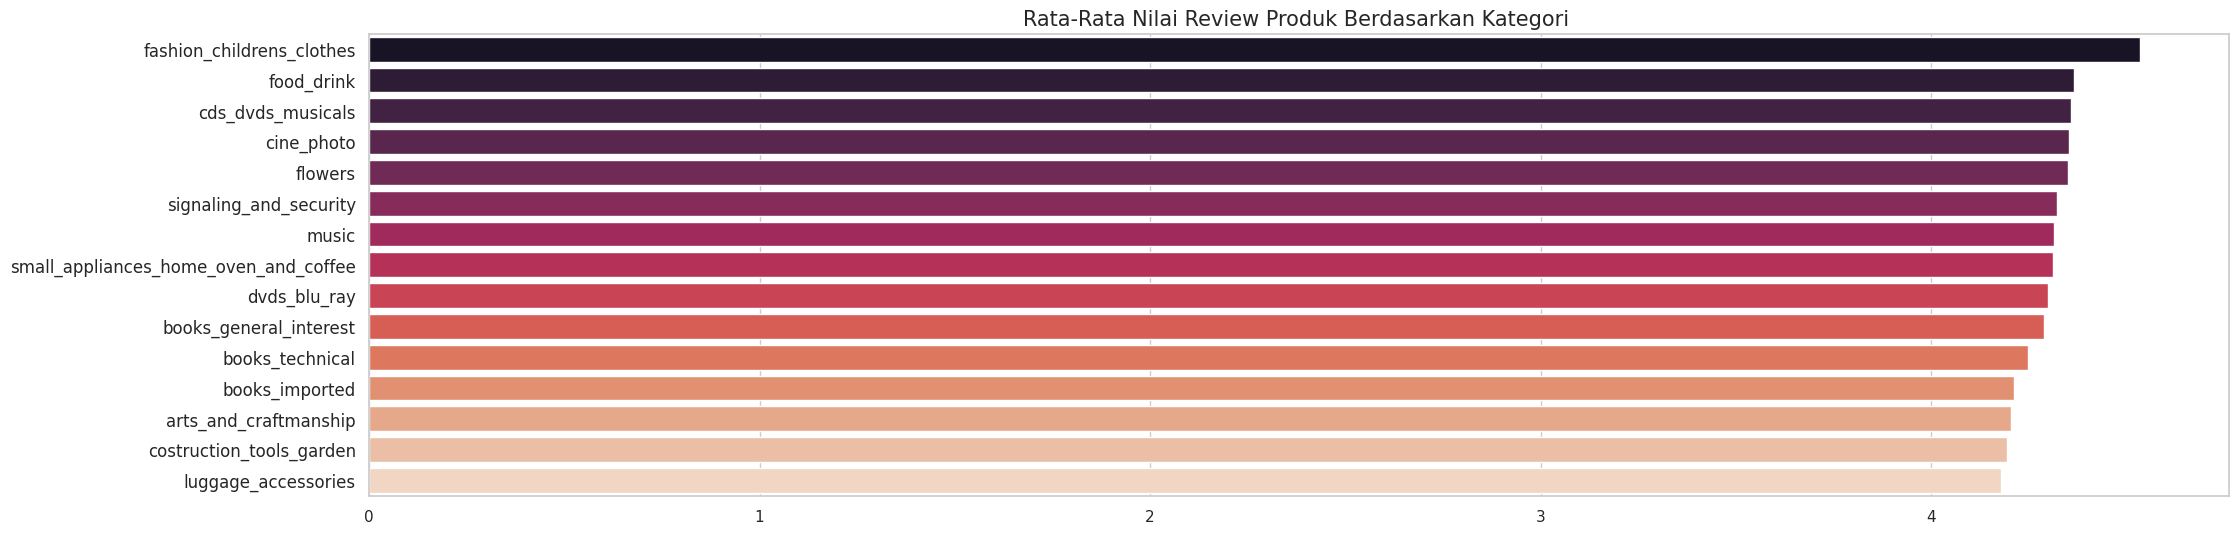

In [208]:
#membuat diagram batang untuk rating produk
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6)) #bikin kanvasnya dulu
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="review_score", y="product_category_name_english", hue="product_category_name_english",data=mean_ratings_items_df.head(15), palette="rocket", ax=ax,legend=False)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Rata-Rata Nilai Review Produk Berdasarkan Kategori ", loc="center", fontsize=15)
ax.tick_params(axis ='y', labelsize=12)


>Berdasarkan diagram batang di atas, dapat dilihat bahwa `fashion_childerns_clothes` menempati urutan teratas sebagai produk dengan nilai review terbaik. Sementara itu, di urutan kedua dan ketiga menyusul `food_drink` dan `cds_dvds_musicals` mendapatkan review terbaik dari costumer.

### Pertanyaan 2:

In [209]:
#menentukan produk min dan max yang terjual
sum_order_items_df = alldata_df.groupby("customer_state").order_id.count().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

,customer_state,order_id
0,SP,16132
1,RJ,5050
2,MG,4397
3,RS,2107
4,PR,1899
5,SC,1403
6,BA,1314
7,GO,764
8,ES,763
9,DF,761


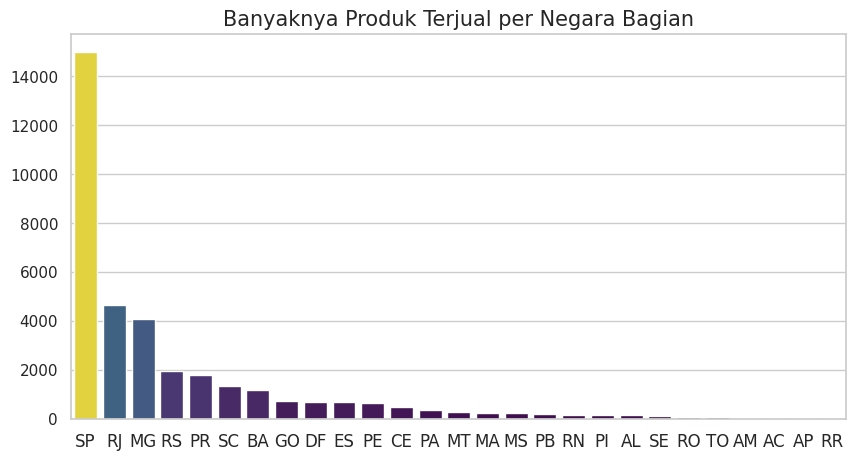

In [210]:
#membuat diagram batang untuk produk terjual terbanyak
bycategory_df = alldata_df.groupby(by=["customer_state"]).order_id.nunique().reset_index()
bycategory_df.rename(columns={
    "order_id": "cust_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="cust_count",
    x="customer_state",
    hue="cust_count",
    data=bycategory_df.sort_values(by="cust_count", ascending=False),
    palette="viridis", legend=False
)
plt.title("Banyaknya Produk Terjual per Negara Bagian", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

>Berdasarkan diagram batang di atas, negara bagian SP menempati urutan pertama dalam banyaknya order, disusul dengan negara bagian RJ, MG, RS, dan PR di urutan lima besar.

###Pertanyaan 3:

In [211]:
#menentukan tipe payment yang paling sering digunakan
count_payment_type_df = alldata_df.groupby("payment_type").order_id.count().sort_values(ascending=False).reset_index()
count_payment_type_df.head(15)

,payment_type,order_id
0,credit_card,28232
1,boleto,7241
2,voucher,1885
3,debit_card,563


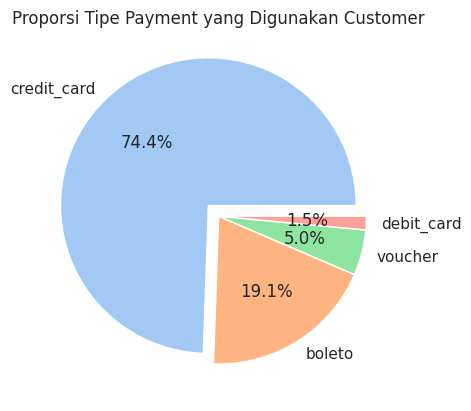

In [212]:
#membuat diagram lingkaran proporsi penggunaan tipe payment
payment_count = alldata_df['payment_type'].value_counts()
colors = sns.color_palette("pastel", len(payment_count))
explode = (0.1, 0, 0, 0)

plt.pie(
    x=payment_count,
    labels=payment_count.index,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode
)
plt.title('Proporsi Tipe Payment yang Digunakan Customer')

plt.show()

>Berdasarkan pie-chart di atas, diperoleh bahwa mayoritas customer menggunakan tipe pembayaran dengan `credit_card` yaitu sebesar 74.4%. Tipe pembayaran yang paling sepi peminat yaitu `debit_card` dengan persentase 1.5%.



###Pertanyaan 4:

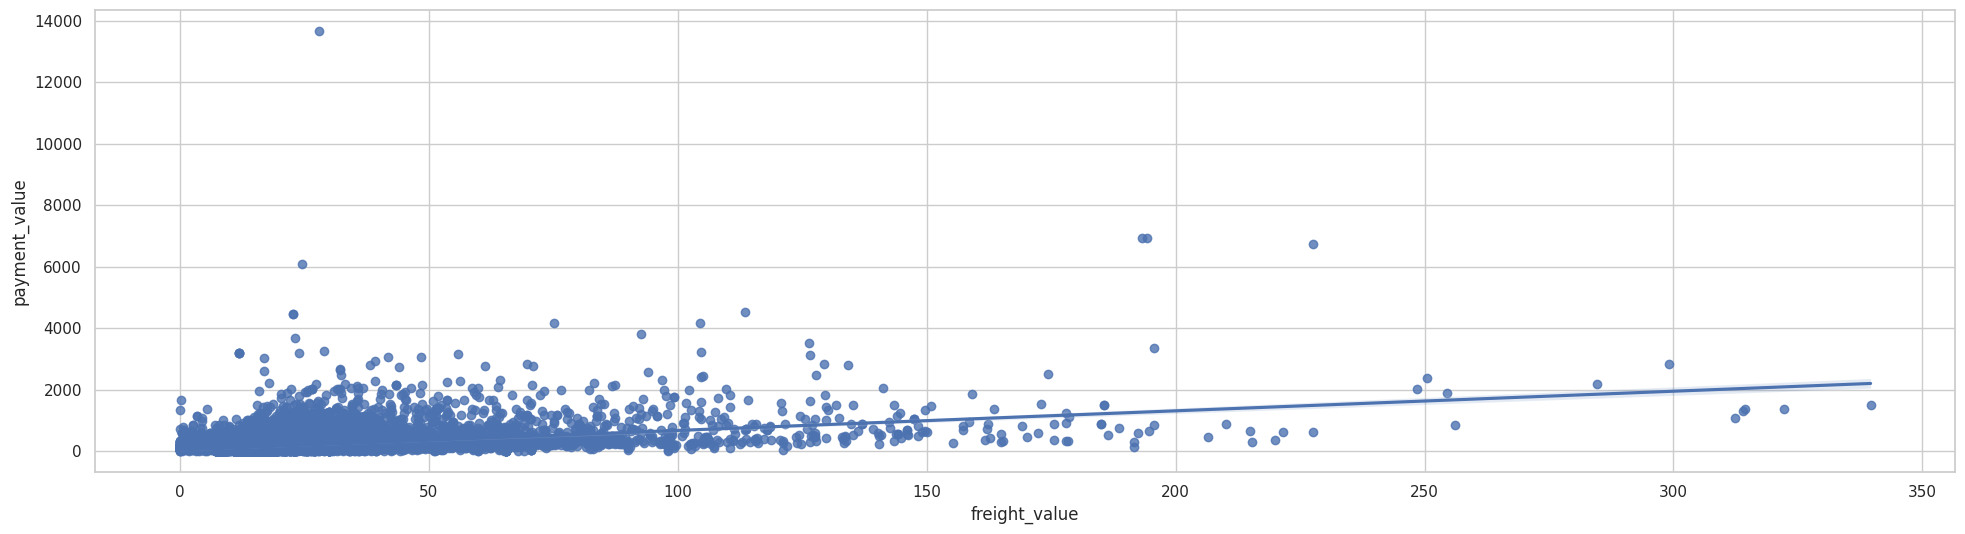

In [214]:
#melihat korelasi antara payment_value dan freight_value
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6)) #bikin kanvasnya dulu
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.regplot(x=alldata_df['freight_value'], y=alldata_df['payment_value'])
plt.show()

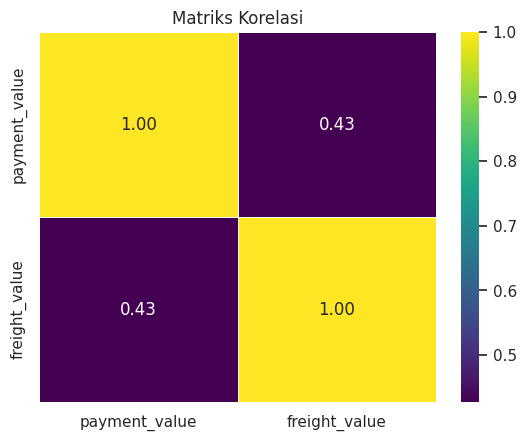

In [215]:
selected_columns = alldata_df[['payment_value','freight_value']]
selected_columns.head(15)
correlation_mat = selected_columns.corr()
sns.heatmap(correlation_mat, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()

>Berdasarkan scatterplot antara payment_value vs freight_value, dapat dilihat bahwa pola data tidak sepenuhnya mengikuti pola linier. Hal ini terbukti dengan nilai korelasi yang ditunjukkan oleh matriks korelasi antara keduanya yaitu sebesar 44%, sehingga korelasi linier antara kedua variabel tidak cukup kuat meskipun saling bersesuaian.

## Conclusion

- Kategori produk yang memperoleh skor review tertinggi, yaitu `fashion_children_clothes`.
- Tingkat penjualan tertinggi terjadi di negara bagian SP, sedangkan terendah yaitu di negara bagian RR.
- Tipe payment yang paling banyak digunakan yaitu `credit_card`.
- `freight_value` dan `payment_value` tidak memiliki hubungan linier yang cukup kuat meskipun saling bersesuaian.